In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from pandas.plotting import register_matplotlib_converters
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
file_path = os.path.join(os.getcwd(), 'sheets','sammy.csv')
file_path_organic = os.path.join(os.getcwd(), 'sheets','sammy_organic.csv')
print(file_path)
print(file_path_organic)
mydata = pd.read_csv(file_path, index_col='date')
mydata.index = pd.to_datetime(mydata.index, format="%Y-%m-%d")

mydata_organic = pd.read_csv(file_path_organic, parse_dates=['date'], index_col='date')
mydata.head()

/Users/sammyhajomar/Desktop/Incredible Python/sheets/sammy.csv
/Users/sammyhajomar/Desktop/Incredible Python/sheets/sammy_organic.csv


,sessions,sessions_avg,bounce_rate
date,,,
2019-01-01,314,62,52.0
2019-01-02,406,81,43.0
2019-01-03,458,91,46.0
2019-01-04,448,89,45.0
2019-01-05,391,78,47.0


In [3]:
mydata_organic.head()

,organic_sessions,sessions_avg,bounce_rate
date,,,
2019-01-01,213,42,46.0
2019-01-02,286,57,41.0
2019-01-03,249,49,40.0
2019-01-04,286,57,35.0
2019-01-05,249,49,46.0


In [4]:
sessions_month = mydata['sessions'].resample('M').sum()/5
#print(sessions_month)
organic_sessions_month = mydata_organic['organic_sessions'].resample('M').sum()/5
#print(organic_sessions_month)
sessions_month.index = sessions_month.index.strftime('%B')

bounce_month = mydata['bounce_rate'].resample('M').mean()
#print(bounce_month.round(1))
organic_bounce_month = mydata_organic['bounce_rate'].resample('M').mean()
#print(organic_bounce_month)

/Users/sammyhajomar/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


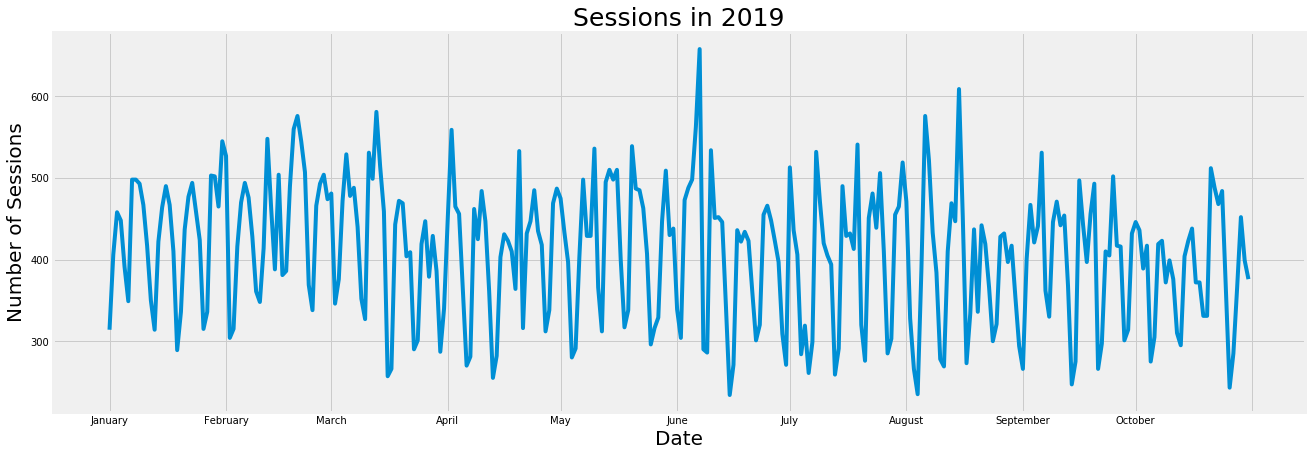

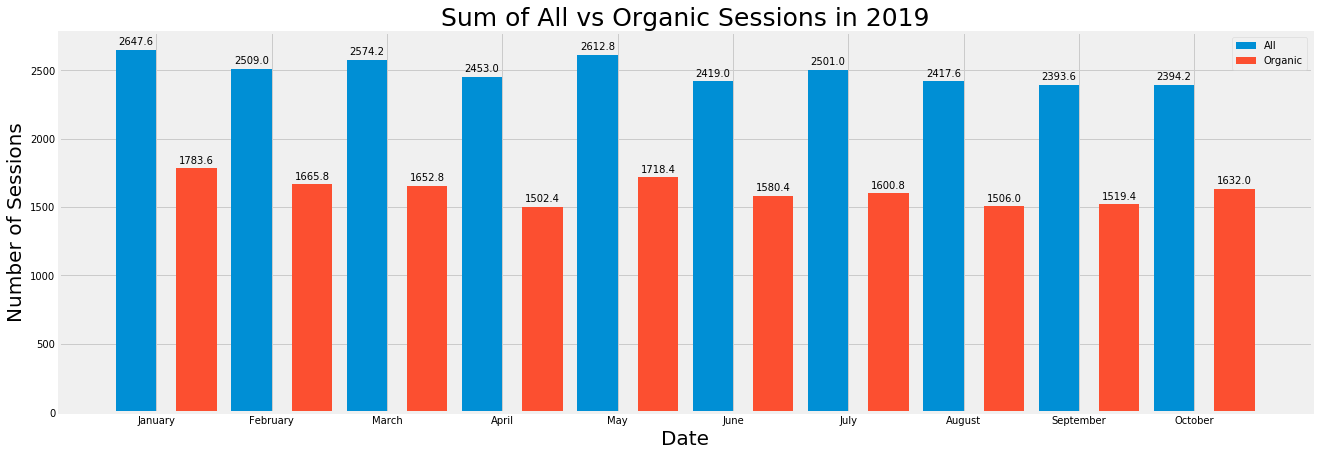

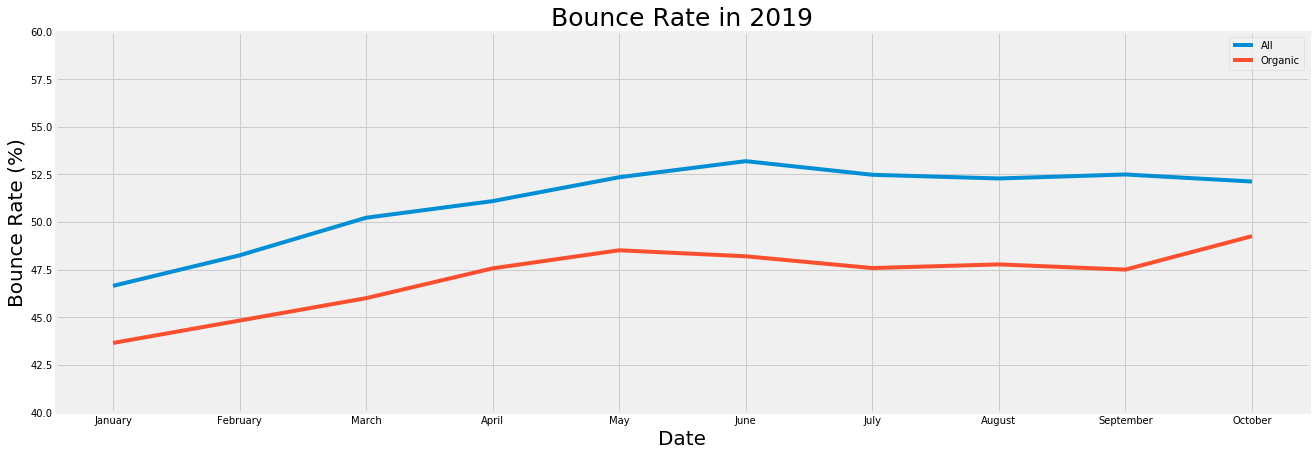

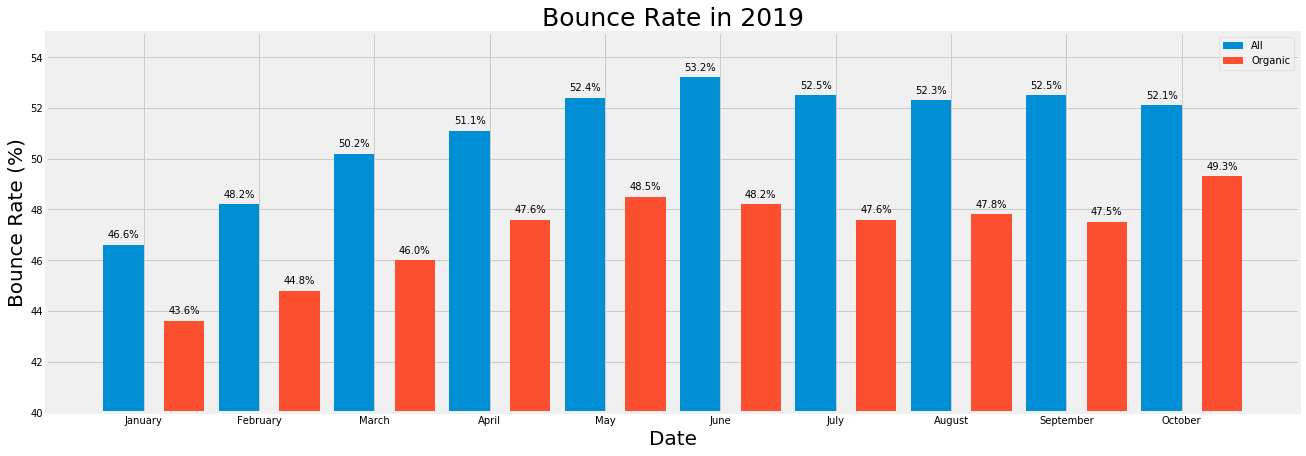

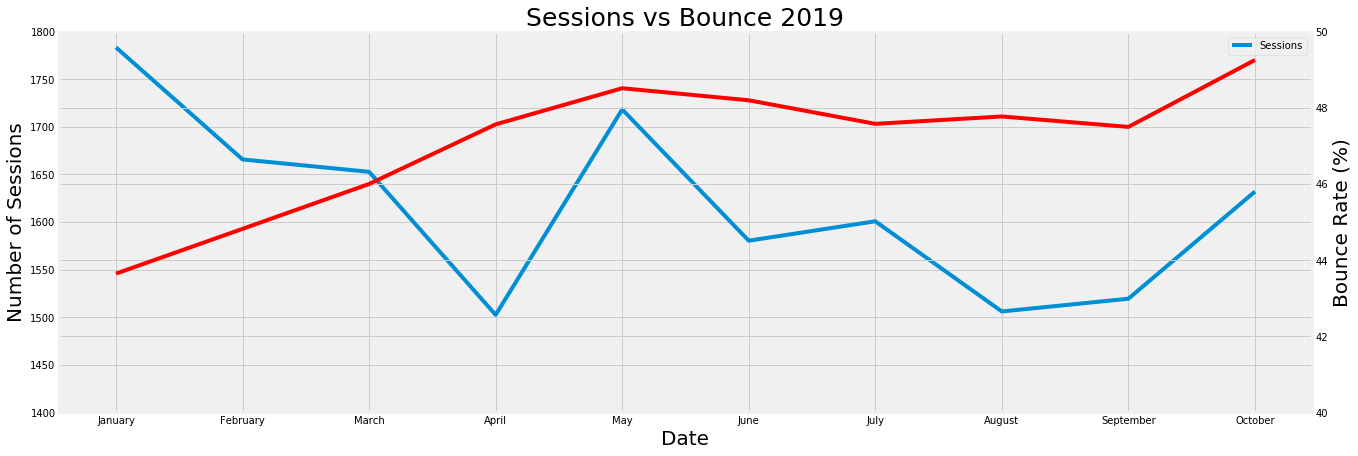

In [5]:
fig1, ax1 = plt.subplots(figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))
fig3, ax3 = plt.subplots(figsize=(20, 7))
fig4, ax4 = plt.subplots(figsize=(20, 7))
fig5, ax5 = plt.subplots(figsize=(20, 7))

x = np.arange(len(sessions_month))  # the label locations
width = 0.35  # the width of the bars

#First Plot (Sessions - Days)
ax1.plot(mydata.index, mydata['sessions'], linestyle='solid', marker = None)
ax1.set_title('Sessions in 2019', fontsize=25)
ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel('Number of Sessions', fontsize=20)
ax1.set_xticklabels(sessions_month.index)

#Second Plot (All vs Organic Sessions)
rects1 = ax2.bar(x - width/2, sessions_month, width, label='All')
rects2 = ax2.bar(x + width, organic_sessions_month, width, label='Organic')
ax2.set_xticks(x)
ax2.set_xticklabels(sessions_month.index)
ax2.legend()
ax2.set_title('Sum of All vs Organic Sessions in 2019', fontsize=25)
ax2.set_xlabel('Date', fontsize=20)
ax2.set_ylabel('Number of Sessions', fontsize=20)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

#4th Plot (All vs Organic Bounce Rate - Line)
ax3.plot(x, bounce_month, label="All")
ax3.plot(x, organic_bounce_month, label="Organic")
ax3.set_xticks(x)
ax3.set_xticklabels(sessions_month.index)
ax3.set_ylim([40,60])
ax3.legend()
ax3.set_title('Bounce Rate in 2019', fontsize=25)
ax3.set_xlabel('Date', fontsize=20)
ax3.set_ylabel('Bounce Rate (%)', fontsize=20)

#5th Plot (All vs Organic Bounce Rate - Bar)
rects3 = ax4.bar(x - width/2, bounce_month.round(1), width, label='All')
rects4 = ax4.bar(x + width, organic_bounce_month.round(1), width, label='Organic')
ax4.set_xticks(x)
ax4.set_xticklabels(sessions_month.index)
ax4.legend()
ax4.set_ylim([40,55])
ax4.set_title('Bounce Rate in 2019', fontsize=25)
ax4.set_xlabel('Date', fontsize=20)
ax4.set_ylabel('Bounce Rate (%)', fontsize=20)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax4.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects3)
autolabel(rects4)

ax5.plot(x, organic_sessions_month, label="Sessions")
ax5.set_xticks(x)
ax5.set_xticklabels(sessions_month.index)
ax5.set_ylim([1400,1800])
ax5.set_title('Sessions vs Bounce 2019', fontsize=25)
ax5.set_xlabel('Date', fontsize=20)
ax5.set_ylabel('Number of Sessions', fontsize=20)
ax5.legend()

ax6 = ax5.twinx()

ax6.plot(x, organic_bounce_month, color='red', label="Bounce Rate")
ax6.set_ylim([40,50])
ax6.set_ylabel('Bounce Rate (%)', fontsize=20)

#fig1.savefig('sessions.png')
#fig2.savefig('organic.png')
#fig3.savefig('all_vs_organic.png')
#fig4.savefig('bounce_rate.png')
#fig5.savefig('bounce_rate_bar.png')
plt.show()

## Benefits Google Analytics API vs Google Analytics Native
- Aggregating data across multiple clients to create industry benchmarks
    - Ability to compare individual clients to benchmark to assess performance
    - Analyzing effects of Google Algorithm update
- Better data visualization with more flexiblity
    - Better internal reporting for AMs and SEOs to use when creating client strategies
    - Publishing of industry data analysis
- Combine metrics to get more insight
    - For example: goal completions per number of sessions